An example of getting the number of visits over the sky

Installation instructions for rubin_sim can be found in the README at: https://github.com/lsst/rubin_sim

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils
from rubin_sim.data import get_baseline

In [2]:
# Grab the current baseline file. Should have been downloaded with rubin_sim. 
# Can grab lots of different sims from: http://astro-lsst-01.astro.washington.edu:8081/
baseline_file = get_baseline()
name = os.path.basename(baseline_file).replace('.db','')
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)

In [3]:
bundle_list = []

# col here could be anything
metric = maf.metrics.CountMetric(col=['night'], metric_name='Nvis')
# Select all the visits. Could do something like 'filter="r"' 
sql = ''
slicer = maf.slicers.HealpixSlicer()
plot_dict = {'color_max': 950}
bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name, plot_dict=plot_dict))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:143: UserWarning: Optimal bin calculation tried to make 1939 bins, returning 200
  warnings.warn(


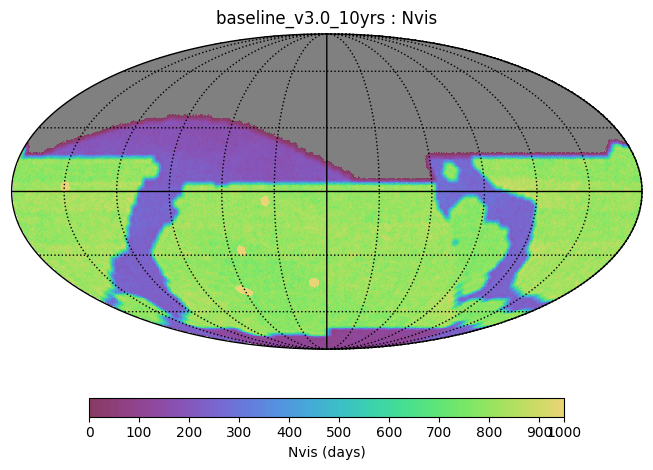

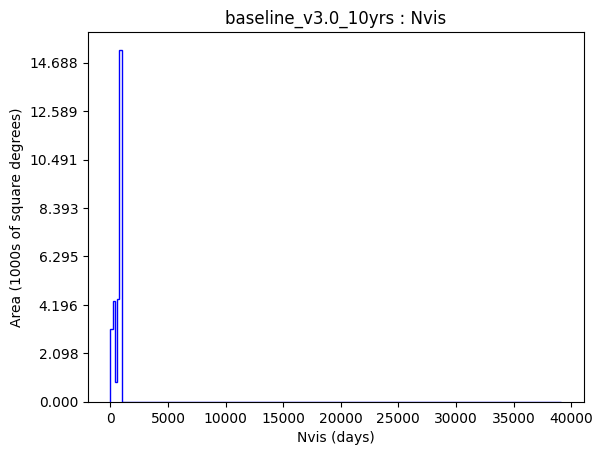

In [4]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, out_dir=out_dir, results_db=results_db)
bg.run_all()
bg.plot_all(closefigs=False)

In [5]:
# Results are stored in the bundleDict
bd


{'baseline_v3_0_10yrs_Nvis_HEAL': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x2b0f42750>}

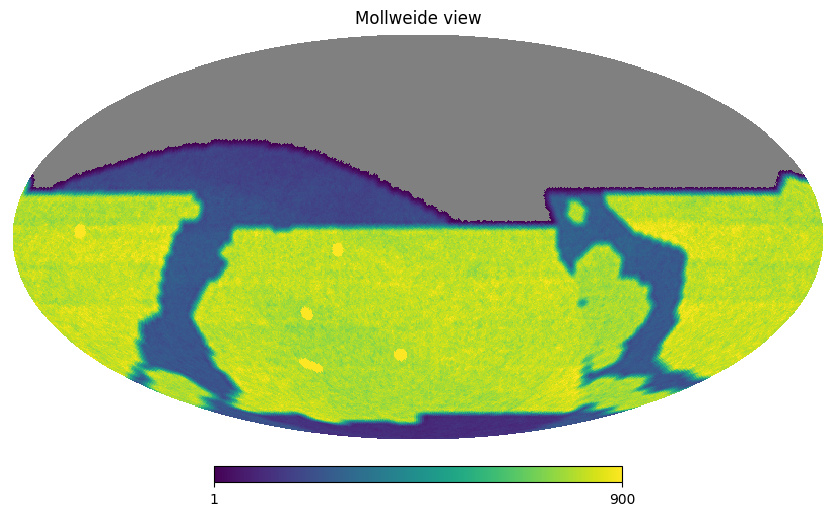

In [6]:
# can look at the results manually
hp.mollview(bd['baseline_v3_0_10yrs_Nvis_HEAL'].metric_values, max=900)